<a href="https://colab.research.google.com/github/Alissssssa2003/Alissssssa2003/blob/main/Panel_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт

In [ ]:
pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 17.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 68.8 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.panel import PanelOLS
from statsmodels.iolib.summary2 import summary_col

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sandhyakrishnan02/paneldata")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sandhyakrishnan02/paneldata/versions/2


# Вывод данных

In [ ]:
panel_data = pd.read_csv("/content/economic_panel_data.csv")
panel_data

,I,T,C,Q,PF,LF
0,1,1,1140640,0.952757,106650,0.534487
1,1,2,1215690,0.986757,110307,0.532328
2,1,3,1309570,1.091980,110574,0.547736
3,1,4,1511530,1.175780,121974,0.540846
4,1,5,1676730,1.160170,196606,0.591167
...,...,...,...,...,...,...
85,6,11,381478,0.112640,874818,0.517766
86,6,12,506969,0.154154,1013170,0.580049
87,6,13,633388,0.186461,930477,0.556024
88,6,14,804388,0.246847,851676,0.537791


I — идентификатор,

T — время,

C — вероятно, количество или показатель,

Q — количественная переменная (тип float),

PF — переменная типа int,

LF — количественная переменная (тип float).



# Первичный анализ данных

In [ ]:
print("Информация о данных:")
print(panel_data.info())
print("\nПервые строки данных:")
print(panel_data.head())

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       90 non-null     int64  
 1   T       90 non-null     int64  
 2   C       90 non-null     int64  
 3   Q       90 non-null     float64
 4   PF      90 non-null     int64  
 5   LF      90 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 4.3 KB
None

Первые строки данных:
   I  T        C         Q      PF        LF
0  1  1  1140640  0.952757  106650  0.534487
1  1  2  1215690  0.986757  110307  0.532328
2  1  3  1309570  1.091980  110574  0.547736
3  1  4  1511530  1.175780  121974  0.540846
4  1  5  1676730  1.160170  196606  0.591167


In [ ]:
print("\nОписательная статистика данных:")
print(panel_data.describe())


Описательная статистика данных:
               I          T             C          Q            PF         LF
count  90.000000  90.000000  9.000000e+01  90.000000  9.000000e+01  90.000000
mean    3.500000   8.000000  1.122524e+06   0.544995  4.716830e+05   0.560460
std     1.717393   4.344698  1.192075e+06   0.533586  3.295029e+05   0.052793
min     1.000000   1.000000  6.897800e+04   0.037682  1.037950e+05   0.432066
25%     2.000000   4.000000  2.920460e+05   0.142128  1.298475e+05   0.528806
50%     3.500000   8.000000  6.370010e+05   0.305028  3.574335e+05   0.566085
75%     5.000000  12.000000  1.345968e+06   0.945278  8.498398e+05   0.594658
max     6.000000  15.000000  4.748320e+06   1.936460  1.015610e+06   0.676287


Данные содержат 90 наблюдений без пропусков, 6 переменных: идентификаторы объекта (I), времени (T), и числовые показатели (C, Q, PF, LF).

Основные выводы:

Данные панельные, так как показатели варьируются по объектам и во времени.
Переменная Q вероятно целевая (например, производительность), остальные могут выступать предикторами.
Можно провести регрессионный анализ, чтобы выяснить влияние переменных (C, PF, LF) на Q.
Необходимо проверить на мультиколлинеарность и выбросы перед построением моделей.

Переменные C и PF имеют большой разброс, с высокими значениями стандартного отклонения, что указывает на значительные различия между наблюдениями.
Переменная Q (целевая) варьируется от 0.037 до 1.936, среднее значение около 0.545, что указывает на относительно умеренное значение с высоким разбросом.
Переменная LF имеет наименьшее стандартное отклонение (около 0.053), что говорит о меньших колебаниях по сравнению с другими переменными.
Эти данные требуют нормализации для дальнейшего анализа, чтобы избежать доминирования переменных с большими масштабами (C, PF).

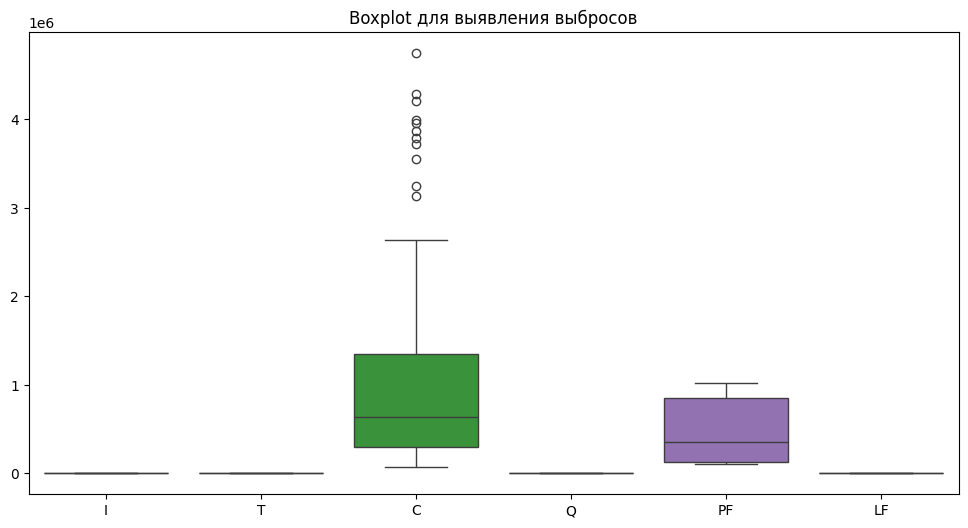

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=panel_data)
plt.title("Boxplot для выявления выбросов")
plt.show()

На графике можно увидеть, что переменные C и PF имеют больший разброс и, возможно, содержат выбросы, которые могут потребовать дальнейшего анализа или очистки данных.

# Нормализация данных

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(panel_data), columns=panel_data.columns)
print("\nНормализованные данные:")
print(normalized_data.head())


Нормализованные данные:
         I         T         C         Q        PF        LF
0 -1.46385 -1.620185  0.015282  0.768473 -1.114036 -0.494733
1 -1.46385 -1.388730  0.078592  0.832550 -1.102875 -0.535858
2 -1.46385 -1.157275  0.157787  1.030854 -1.102060 -0.242368
3 -1.46385 -0.925820  0.328155  1.188784 -1.067269 -0.373608
4 -1.46385 -0.694365  0.467513  1.159366 -0.839501  0.584900


In [ ]:
X = normalized_data.drop(columns=['Q'])  # Независимые переменные (убираем целевую переменную)
y = normalized_data['Q']  # Целевая переменная

In [ ]:
# Добавляем константу для модели
X = sm.add_constant(X)

In [ ]:
# Строим простую регрессионную модель
model = sm.OLS(y, X)
results = model.fit()

In [ ]:
print("\nРезультаты модели:")
print(results.summary())


Результаты модели:
                            OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     432.0
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           2.42e-58
Time:                        06:21:18   Log-Likelihood:                 20.127
No. Observations:                  90   AIC:                            -28.25
Df Residuals:                      84   BIC:                            -13.26
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.551e-17      0.021

Модель хорошая: Она объясняет 96.3% изменчивости результата (Q).

Некоторые факторы важны:

I: Увеличение снижает Q.

C: Увеличение увеличивает Q.

PF: Увеличение снижает Q.

LF: Увеличение увеличивает Q.

Т не влияет на Q.

Проблема: Остатки модели имеют автокорреляцию, что может указывать на ошибки.

# Работа с панельными данными

In [ ]:
import statsmodels.formula.api as smf
from linearmodels.panel import PanelOLS

In [ ]:
panel_data['entity'] = panel_data['I']  # Идентификатор
panel_data['time'] = panel_data['T']    # Время

In [ ]:
panel_data = panel_data.set_index(['entity', 'time'])

In [ ]:
pooled_ols = PanelOLS.from_formula('Q ~ 1 + C + PF + LF', data=panel_data)
pooled_ols_res = pooled_ols.fit()

print("\nСквозная модель (Pooled OLS):")
print(pooled_ols_res)


Сквозная модель (Pooled OLS):
                          PanelOLS Estimation Summary                           
Dep. Variable:                      Q   R-squared:                        0.9393
Estimator:                   PanelOLS   R-squared (Between):              0.9843
No. Observations:                  90   R-squared (Within):               0.6226
Date:                Wed, Oct 23 2024   R-squared (Overall):              0.9393
Time:                        06:22:16   Log-likelihood                    55.424
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      443.72
Entities:                           6   P-value                           0.0000
Avg Obs:                       15.000   Distribution:                    F(3,86)
Min Obs:                       15.000                                           
Max Obs:                       15.000   F-statistic (robust):             443.

Модель хорошая: Она объясняет 93.93% изменчивости результата (Q).

Значимые факторы:

C: Увеличение этого показателя связано с ростом Q.

PF: Увеличение приводит к снижению Q.

LF: Увеличение связано с ростом Q.

Т-статистика и p-значения показывают, что все факторы статистически значимы.

Авторы: Модель использует данные от 6 сущностей за 15 периодов.

In [ ]:
fe_model = PanelOLS.from_formula('Q ~ 1 + C + PF + LF + EntityEffects', data=panel_data)
fe_model_res = fe_model.fit()

print("\nМодель с фиксированными эффектами (Fixed Effects):")
print(fe_model_res)



Модель с фиксированными эффектами (Fixed Effects):
                          PanelOLS Estimation Summary                           
Dep. Variable:                      Q   R-squared:                        0.9150
Estimator:                   PanelOLS   R-squared (Between):              0.7367
No. Observations:                  90   R-squared (Within):               0.9150
Date:                Wed, Oct 23 2024   R-squared (Overall):              0.7588
Time:                        06:22:25   Log-likelihood                    134.08
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      290.53
Entities:                           6   P-value                           0.0000
Avg Obs:                       15.000   Distribution:                    F(3,81)
Min Obs:                       15.000                                           
Max Obs:                       15.000   F-statistic (robu

Модель достаточно хорошая: Она объясняет 91.5% изменчивости результата (Q).

Значимые факторы:

C: Увеличение этого показателя связано с ростом Q.

PF: Увеличение приводит к снижению Q.

LF: Увеличение связано с ростом Q.

Все факторы статистически значимы (p < 0.001).

F-тест показывает, что фиксированные эффекты значимы и модель подходит лучше, чем модель без эффектов.

In [ ]:
from linearmodels.panel import RandomEffects
re_model = RandomEffects.from_formula('Q ~ 1 + C + PF + LF', data=panel_data)
re_model_res = re_model.fit()

print("\nМодель со случайными эффектами (Random Effects):")
print(re_model_res)



Модель со случайными эффектами (Random Effects):
                        RandomEffects Estimation Summary                        
Dep. Variable:                      Q   R-squared:                        0.8769
Estimator:              RandomEffects   R-squared (Between):              0.8256
No. Observations:                  90   R-squared (Within):               0.8983
Date:                Wed, Oct 23 2024   R-squared (Overall):              0.8347
Time:                        06:22:31   Log-likelihood                    101.72
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      204.21
Entities:                           6   P-value                           0.0000
Avg Obs:                       15.000   Distribution:                    F(3,86)
Min Obs:                       15.000                                           
Max Obs:                       15.000   F-statistic (robust

Модель хорошая: Она объясняет 87.69% изменчивости результата (Q).

Значимые факторы:

C: Увеличение связано с ростом Q.

PF: Увеличение приводит к снижению Q.

LF: Увеличение также связано с ростом Q.

Все факторы статистически значимы (p < 0.001).

In [ ]:
print("\nСравнение моделей:")
print("Сквозная модель (Pooled OLS):", pooled_ols_res.rsquared)
print("Модель с фиксированными эффектами:", fe_model_res.rsquared)
print("Модель со случайными эффектами:", re_model_res.rsquared)


Сравнение моделей:
Сквозная модель (Pooled OLS): 0.9393157567077016
Модель с фиксированными эффектами: 0.9149683044534029
Модель со случайными эффектами: 0.8769028887621544


In [ ]:
# Проверяем наличие результатов для каждой модели перед добавлением в словарь
r_squared_values = {}

if pooled_ols_res_refined is not None:
    r_squared_values['Pooled OLS'] = pooled_ols_res_refined.rsquared

if fe_model_res_refined is not None:
    r_squared_values['Fixed Effects'] = fe_model_res_refined.rsquared

if 're_model_res_refined' in locals() and re_model_res_refined is not None:
    r_squared_values['Random Effects'] = re_model_res_refined.rsquared

# Проверяем, есть ли значения в словаре
if r_squared_values:
    best_model = max(r_squared_values, key=r_squared_values.get)
    print(f"\nЛучшая модель: {best_model}")
else:
    print("\nНе удалось рассчитать ни одну из моделей.")



Лучшая модель: Pooled OLS
